<a href="https://colab.research.google.com/github/vicotrbb/machine_learning/blob/master/projects/person_traits/open_sex_role_inventory_multioutput_poc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tpot

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 163kB 16.5MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=a053c14abcbcb07312d601c9d8e0d5c3dc30e61e72f71e5a1626eb5d95cde5cf
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import missingno as msno

In [9]:
data = pd.read_csv('data.csv', sep="\t")
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,IPC,source,engnat,age,education,gender,orientation,race,religion,hand
0,1,4,1,5,2,5,1,5,1,4,1,5,5,5,1,1,1,5,1,5,1,5,4,5,1,5,1,5,1,5,1,5,1,5,1,3,1,5,1,4,1,5,1,5,579,211,US,1,1,1,18,2,2,2,6,1,1
1,1,5,1,1,1,4,5,1,5,5,4,3,1,4,5,2,5,4,4,2,5,4,5,3,1,3,5,1,1,1,1,1,3,4,3,3,5,2,5,3,5,5,5,3,63,242,PE,1,0,1,19,2,1,2,6,1,2
2,1,4,3,3,2,5,2,5,2,3,5,1,1,3,3,2,1,4,2,3,1,3,5,1,1,5,2,4,1,3,1,1,5,4,3,2,5,5,1,4,2,1,3,3,24,265,CH,1,0,2,18,2,2,1,1,1,1
3,1,1,4,4,5,4,5,5,4,2,1,4,4,2,4,2,5,2,2,3,2,4,2,4,5,2,4,4,1,1,5,4,5,5,4,2,1,4,2,3,4,1,4,3,3,231,US,1,1,1,19,3,2,1,6,2,1
4,1,2,3,4,3,3,5,1,3,2,4,1,1,3,4,1,4,4,3,1,4,2,5,2,2,2,4,1,2,1,2,1,1,2,2,4,4,3,3,1,1,3,4,3,25,274,US,2,1,1,16,2,1,1,6,2,1


In [10]:
data["country"].value_counts()

US    198564
GB     28151
CA     17876
AU      9376
DE      6978
       ...  
GM         1
XK         1
MH         1
PF         1
VU         1
Name: country, Length: 184, dtype: int64

In [11]:
data["race"].value_counts()

6    222082
1     31090
2     24299
7     19071
3     15651
0      3060
4      2876
5       444
Name: race, dtype: int64

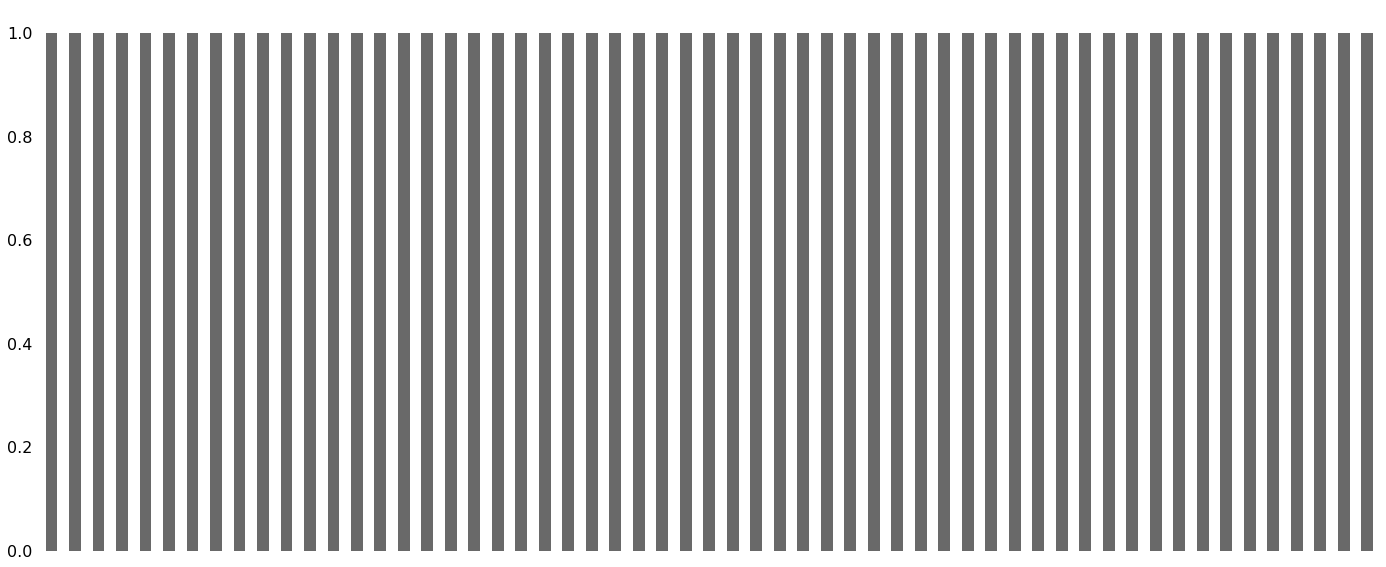

In [12]:
msno.bar(data)

In [13]:
education = {
    1: 'Ensino médio incompleto',
    2: 'Ensino médio completo',
    3: 'Ensino superior completo',
    4: 'Mestre ou doutor'
}

gender = {
    1: "Homem",
    2: "Mulher",
    3: "Outro"
}

orientation = {
    1: "Heterosessual",
    2: "Bisexual",
    3: "Homosexual",
    4: "Asexual",
    5: "Outro"
}

race = {
    1: "Misto",
    2: "Asiatico",
    3: "Negro",
    4: "Nativo americano",
    5: "Nativo australiano",
    6: "Branco",
    7: "Outros"
}

religion = {
    1: "Ateu/agnostico",
    2: "Cristão",
    3: "Mussoumano",
    4: "Judeu",
    5: "Hindu",
    6: "Buddhist",
    7: "Outros"
}

hand = {
    1: "Destro",
    2: "Canhoto",
    3: "Ambas"
}

In [14]:
features = [
    "Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12","Q13","Q14",
    "Q15","Q16","Q17","Q18","Q19","Q20","Q21","Q22","Q23","Q24","Q25","Q26",
    "Q27","Q28","Q29","Q30","Q31","Q32","Q33","Q34","Q35","Q36","Q37","Q38",
    "Q39","Q40","Q41","Q42","Q43", "Q44"
]

target = ["age", "education", "gender", "orientation", "race", "religion", "hand"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target],
                                                    train_size=0.80, test_size=0.20)

In [16]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [17]:
imputer = SimpleImputer(strategy="median")
imputer.fit(y_train)

y_train = imputer.transform(y_train)
y_test = imputer.transform(y_test)

In [18]:
print(X_train.shape)
print(y_train.shape)

(254858, 44)
(254858, 7)


# TPOT pipeline optimization

In [ ]:
from tpot import TPOTClassifier

In [ ]:
pipeline_optimizer = TPOTClassifier()
pipeline_optimizer = TPOTClassifier(generations=100, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [ ]:
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))

# Simple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, train_predict)))
r2 = r2_score(y_train, train_predict)

print('Train set perfomance')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

Train set perfomance
RMSE: 1794608.6001533936
R2: 0.09088537875939459


# MLP classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(max_iter=1000)
model.fit(X_train, y_train)

# Sklearn MultiOutputRegressor

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(random_state=84)
model = MultiOutputRegressor(ridge)
model.fit(X_train, y_train)

In [ ]:
model.get_params()

{'estimator': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=84, solver='auto', tol=0.001),
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': None,
 'estimator__normalize': False,
 'estimator__random_state': 84,
 'estimator__solver': 'auto',
 'estimator__tol': 0.001,
 'n_jobs': None}

In [ ]:
model.score(X_test, y_test)

-12.581801181359722

# KNN multioutput

Muito demorado.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()

model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
model.score(X_train[:5], y_train[:5])

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.28883928571428563

# Decision Tree Regressor

Melhor resultado até agora, provavel overfitting.

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [35]:
model.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9999999999998015

In [36]:
X_train[2]

array([1., 5., 1., 1., 1., 5., 2., 4., 1., 4., 1., 5., 1., 5., 1., 2., 1.,
       4., 1., 4., 2., 3., 3., 2., 1., 3., 1., 3., 1., 5., 2., 1., 1., 4.,
       1., 1., 3., 3., 1., 4., 4., 4., 1., 2.])

In [37]:
y_train[2]

array([31.,  2.,  2.,  1.,  3.,  2.,  1.])

In [38]:
model.predict(X_test[2].reshape(1, -1))

array([[31.,  4.,  2.,  1.,  3.,  2.,  1.]])

# Chain regressor

# Support Vector Regressor

In [22]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR

In [30]:
model = LinearSVR()
wrapper = RegressorChain(model, order=[0,1])

In [26]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(wrapper, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: nan (nan)


In [ ]:
wrapper.fit(X_train, y_train)
yhat = wrapper.predict(X_test[1])

print('Predicted: %s' % yhat[0])